<h2 style="color:blue" align="left">Tensorboard for neural network</h2>

### 1. We classify handwritten digits by a simple neural network which has only input and output layers. 
### 2. Then, we add a hidden layer 
### 3. We check how the performance of the model improves by Tensorboard

In [7]:
%pip install tensorflow[and-cuda]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2024-03-06 21:03:12.532500: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 21:03:12.532543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 21:03:12.554401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 21:03:12.626073: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 21:03:13.696475: W tensorflow/compiler/tf2

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

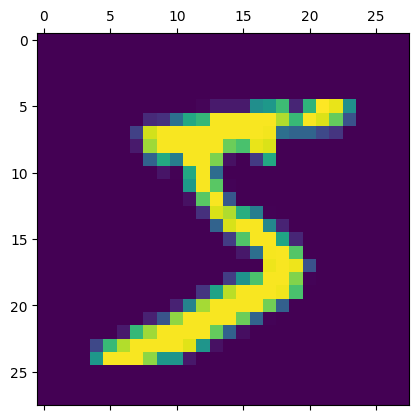

In [6]:
plt.matshow(X_train[0])

In [9]:
import tensorflow as tf
import datetime
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print('y_train[0]:', y_train[0])
print('x_train[0].shape:', x_train[0].shape)
print('len(x_test:', len(x_test))
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

y_train[0]: 5
x_train[0].shape: (28, 28)
len(x_test: 10000
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2186 - accuracy: 0.9356 - val_loss: 0.1072 - val_accuracy: 0.9677
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0959 - accuracy: 0.9706 - val_loss: 0.0771 - val_accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0694 - accuracy: 0.9783 - val_loss: 0.0778 - val_accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9823 - val_loss: 0.0689 - val_accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0750 - val_accuracy: 0.9788


<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

len(X_train): 60000
len(X_test): 10000
X_train[0].shape: (28, 28)


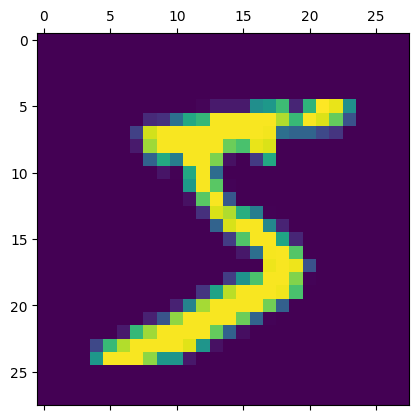

In [9]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import datetime

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print('len(X_train):', len(X_train))
print('len(X_test):', len(X_test))
print('X_train[0].shape:', X_train[0].shape)
plt.matshow(X_train[0])

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
# model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])
log_dir = "logs/adam/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1741 - accuracy: 0.8415 - val_loss: 0.4966 - val_accuracy: 0.8886
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3946 - accuracy: 0.9014 - val_loss: 0.3866 - val_accuracy: 0.9081
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2877 - accuracy: 0.9229 - val_loss: 0.2934 - val_accuracy: 0.9291
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9355 - val_loss: 0.2648 - val_accuracy: 0.9387
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2251 - accuracy: 0.9413 - val_loss: 0.2629 - val_accuracy: 0.9352


In [4]:
# Instead of Adam, we can try 'SGD'
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/sgd/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 18.1166 - accuracy: 0.1801 - val_loss: 2.0578 - val_accuracy: 0.1966
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0887 - accuracy: 0.1954 - val_loss: 2.3075 - val_accuracy: 0.1182
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1819 - accuracy: 0.1664 - val_loss: 2.0515 - val_accuracy: 0.2006
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2257 - accuracy: 0.1486 - val_loss: 2.3111 - val_accuracy: 0.1028
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3037 - accuracy: 0.1049 - val_loss: 2.3013 - val_accuracy: 0.1135


In [5]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [11]:
model.get_weights()

[array([[-0.01843756,  0.07743466, -0.07351287, ...,  0.05695094,
          0.01478975, -0.05377582],
        [ 0.02777406,  0.08121487,  0.04840022, ..., -0.07798325,
         -0.05549914, -0.05803584],
        [ 0.04645127, -0.05809285,  0.06677407, ...,  0.06166919,
          0.04463665,  0.01383359],
        ...,
        [ 0.02279136,  0.06694025,  0.06715314, ...,  0.02537508,
         -0.00043985, -0.02996801],
        [ 0.0633391 ,  0.06981637,  0.06891194, ...,  0.02516399,
         -0.03742009, -0.00634754],
        [-0.05860579, -0.01688445, -0.07139961, ..., -0.00138226,
          0.00374663, -0.02775013]], dtype=float32),
 array([-0.02390932, -0.02619647, -0.05090549, -0.03790233, -0.07842772,
        -0.07472896, -0.04235824, -0.07211701, -0.05479043, -0.04937717,
        -0.0234906 , -0.11942494, -0.04592701, -0.02976803, -0.05666988,
         0.01376648, -0.02506417, -0.07736241, -0.03210623, -0.0472238 ,
        -0.03830717, -0.0480387 , -0.02867198, -0.02156499, -0.049